# Ejemplo práctico: presupuesto de comunas

En este ejemplo vamos a analizar el presupuesto de las comunas por región. Para esto, vamos a trabajar con los `.csv` de Comunas y Presupuesto por Comunas. Primero vamos a importar nuestros DataFrames y vamos a hacer el _merge_ respectivo.

In [58]:
import pandas as pd

df_comunas = pd.read_csv("codigos.csv", delimiter=";")
df_presupuesto = pd.read_csv("presupuesto_2019.csv", delimiter=";")


In [77]:
df_presupuesto['PRESUPUESTO'].unique()

array(['59072234', '13984411', '7613962', '1584008', '2500000', '3950000',
       '5887820', '100635302', '9379132', '8184166', '7055873',
       '46212087', '2663357', '7294095', '5402459', '4283360', '29543912',
       '9127075', '6147200', '4435860', '6284308', '9106767', '3318171',
       '2998977', '3946468', '59222000', '56819394', '3586345', '4090360',
       '4780000', '8069308', '6299700', '3000000', '7103931', '12768287',
       '21711795', '3110695', '6681407', '3318380', '2090300', '77718000',
       '11386627', '13684060', '1629692', '7683900', '12250000',
       '100482380', '9914468', '12991512', '3549414', '5259050',
       '3009539', '6967050', '3876999', '5947500', '3544127', '20408830',
       '17248430', '7747450', '4283417', '5703367', '4696549', '21518873',
       'No Recepcionado', '11380129', '12353172', '9582451', '13339600',
       '18346041', '3359823', '5133425', '2542648', '4206900', '3513325',
       '24359486', '8872592', '4910700', '16687000', '55996193'

In [82]:
# Limpiamos el DataFrame de presupuesto
df_presupuesto = df_presupuesto.replace("No Recepcionado", 0)
df_presupuesto["PRESUPUESTO"] = df_presupuesto["PRESUPUESTO"].astype(int)

In [83]:
df_presupuesto["PRESUPUESTO"]

0      59072234
1      13984411
2       7613962
3       1584008
4       2500000
         ...   
340    10459691
341     5001190
342     3386698
343     1798500
344     3979700
Name: PRESUPUESTO, Length: 345, dtype: int32

In [84]:
df_presupuesto

,CODIGO,MUNICIPIO,PRESUPUESTO
0,1101,IQUIQUE,59072234
1,1107,ALTO HOSPICIO,13984411
2,1401,POZO ALMONTE,7613962
3,1402,CAMIÑA,1584008
4,1403,COLCHANE,2500000
...,...,...,...
340,16301,SAN CARLOS,10459691
341,16302,COIHUECO,5001190
342,16303,ÑIQUÉN,3386698
343,16304,SAN FABIÁN,1798500


In [85]:
df_comunas

,Código Región,Nombre Región,Abreviatura Región,Código Provincia,Nombre Provincia,Código Comuna 2018,Nombre Comuna
0,1,Tarapacá,TPCA,11,Iquique,1101,Iquique
1,1,Tarapacá,TPCA,11,Iquique,1107,Alto Hospicio
2,1,Tarapacá,TPCA,14,Tamarugal,1401,Pozo Almonte
3,1,Tarapacá,TPCA,14,Tamarugal,1402,Camiña
4,1,Tarapacá,TPCA,14,Tamarugal,1403,Colchane
...,...,...,...,...,...,...,...
341,16,Ñuble,NUBLE,163,Punilla,16301,San Carlos
342,16,Ñuble,NUBLE,163,Punilla,16302,Coihueco
343,16,Ñuble,NUBLE,163,Punilla,16303,Ñiquén
344,16,Ñuble,NUBLE,163,Punilla,16304,San Fabián


In [89]:
# Hacemos el merge
df_merge = df_comunas.merge(df_presupuesto, left_on="Código Comuna 2018", right_on="CODIGO")

# Y dejamos las columnas que necesitmaos
df_merge = df_merge[["Nombre Comuna", "Nombre Región", "PRESUPUESTO"]]
df_merge

,Nombre Comuna,Nombre Región,PRESUPUESTO
0,Iquique,Tarapacá,59072234
1,Alto Hospicio,Tarapacá,13984411
2,Pozo Almonte,Tarapacá,7613962
3,Camiña,Tarapacá,1584008
4,Colchane,Tarapacá,2500000
...,...,...,...
340,San Carlos,Ñuble,10459691
341,Coihueco,Ñuble,5001190
342,Ñiquén,Ñuble,3386698
343,San Fabián,Ñuble,1798500


Ahora, ¿qué pasa cuando hacemos `describe`?

In [90]:
df_merge.describe()

,PRESUPUESTO
count,3.450000e+02
mean,1.413407e+07
std,2.740327e+07
min,0.000000e+00
25%,3.188141e+06
50%,5.372994e+06
75%,1.225000e+07
max,3.399804e+08


¿Qué podemos deducir de los datos anteriores? Ahora veamos estos datos solo para la región metropolitana.

In [144]:
df_metropolitana = df_merge[df_merge["Nombre Región"] == "Metropolitana de Santiago"]
# El apply nos cambia la notación del .describe()
df_metropolitana.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,PRESUPUESTO
count,52.00
mean,43416556.31
std,54609666.38
min,3145694.00
25%,14334394.75
50%,30083565.50
75%,47437241.25
max,339980450.00


Veamos cuál es la comuna de la Región Metropolitana con más presupuesto.

In [145]:
df_metropolitana.sort_values("PRESUPUESTO", ascending=False).head(5)

,Nombre Comuna,Nombre Región,PRESUPUESTO
269,Las Condes,Metropolitana de Santiago,339980450
256,Santiago,Metropolitana de Santiago,163383547
278,Providencia,Metropolitana de Santiago,125041538
274,Maipú,Metropolitana de Santiago,119318265
287,Vitacura,Metropolitana de Santiago,97000000


In [150]:
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
colors = np.random.rand(52)

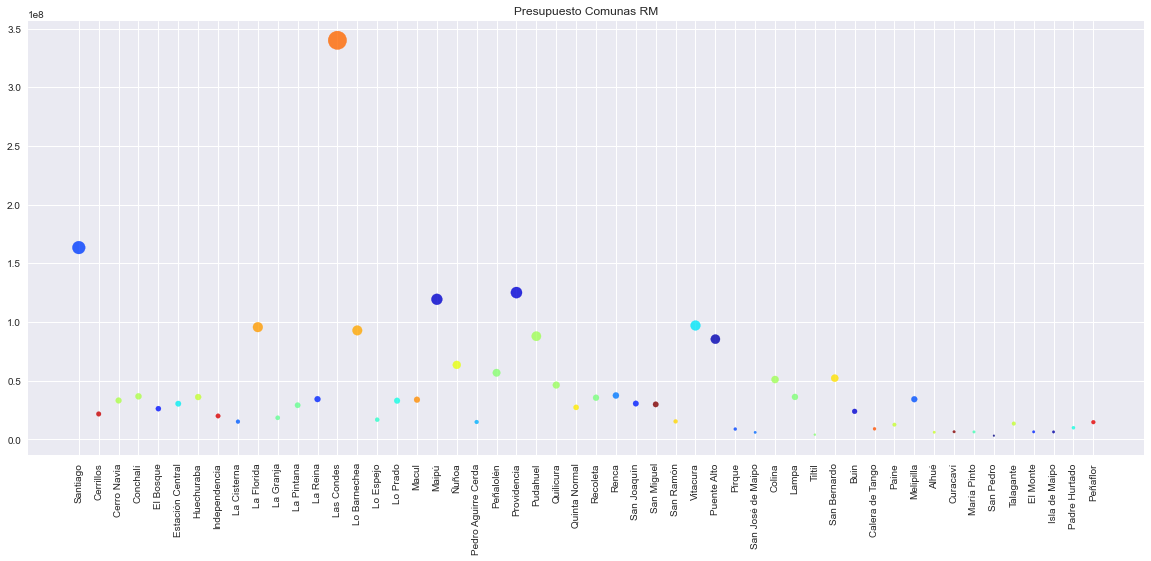

In [154]:
plt.title("Presupuesto Comunas RM")
plt.style.use("seaborn-dark-palette")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [20, 8]
plt.scatter(df_metropolitana["Nombre Comuna"], df_metropolitana["PRESUPUESTO"],
            s=df_metropolitana["PRESUPUESTO"]/1000000, c=colors, cmap="jet", alpha=0.8)

Como vemos, es la comuna de Las Condes. Veamos que pasa cuando sacamos esta comuna del DataFrame.

In [152]:
df_metropolitana_sin_lc = df_metropolitana[df_metropolitana["Nombre Comuna"] != "Las Condes"]

In [157]:
df_metropolitana_sin_lc.sort_values("PRESUPUESTO", ascending=False).head(5)

,Nombre Comuna,Nombre Región,PRESUPUESTO
256,Santiago,Metropolitana de Santiago,163383547
278,Providencia,Metropolitana de Santiago,125041538
274,Maipú,Metropolitana de Santiago,119318265
287,Vitacura,Metropolitana de Santiago,97000000
265,La Florida,Metropolitana de Santiago,95609849


In [158]:
df_metropolitana_sin_lc.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,PRESUPUESTO
count,51.00
mean,37601578.00
std,35332235.46
min,3145694.00
25%,14032736.50
50%,29790072.00
75%,41816220.00
max,163383547.00


Como vemos, el promedio cambió bastante. Vamos a calcular el cambio en cada una de las medidas.

In [159]:
diff_dataframes = df_metropolitana.describe() - df_metropolitana_sin_lc.describe()
diff_dataframes.apply(lambda s: s.apply('{0:.2f}'.format))

,PRESUPUESTO
count,1.00
mean,5814978.31
std,19277430.92
min,0.00
25%,301658.25
50%,293493.50
75%,5621021.25
max,176596903.00


Para comprender de mejor forma los datos, podemos dividir en distintos _bins_ el presupuesto, para así hacer un histograma.

<ipython-input-160-b03b9f07ff5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 5)


<AxesSubplot:>

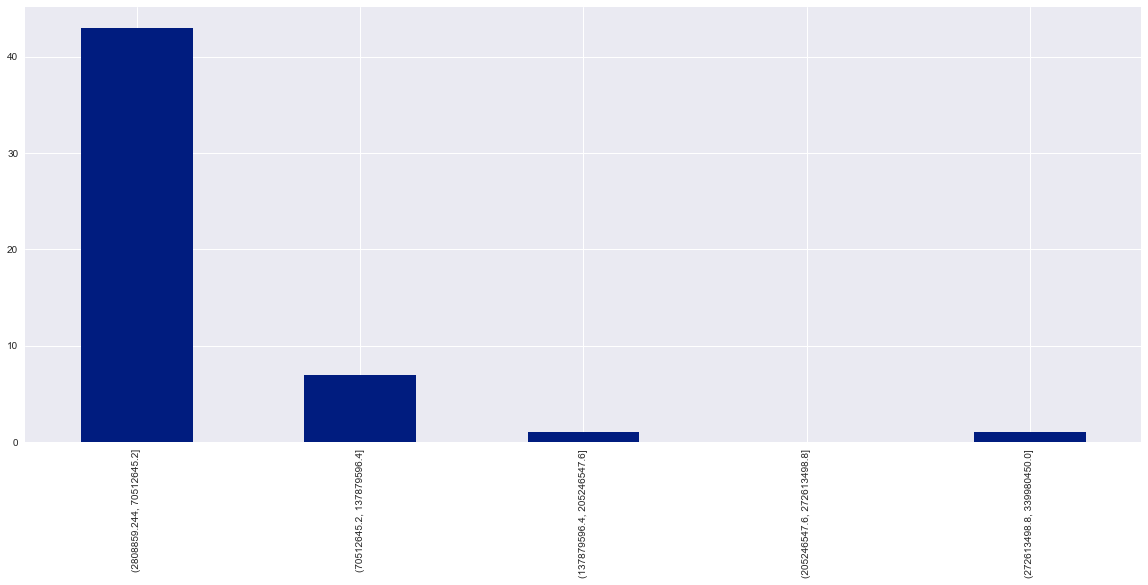

In [160]:
df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 5)
df_metropolitana["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

In [161]:
pd.cut(df_metropolitana["PRESUPUESTO"], 5)

256    (137879596.4, 205246547.6]
257     (2808859.244, 70512645.2]
258     (2808859.244, 70512645.2]
259     (2808859.244, 70512645.2]
260     (2808859.244, 70512645.2]
261     (2808859.244, 70512645.2]
262     (2808859.244, 70512645.2]
263     (2808859.244, 70512645.2]
264     (2808859.244, 70512645.2]
265     (70512645.2, 137879596.4]
266     (2808859.244, 70512645.2]
267     (2808859.244, 70512645.2]
268     (2808859.244, 70512645.2]
269    (272613498.8, 339980450.0]
270     (70512645.2, 137879596.4]
271     (2808859.244, 70512645.2]
272     (2808859.244, 70512645.2]
273     (2808859.244, 70512645.2]
274     (70512645.2, 137879596.4]
275     (2808859.244, 70512645.2]
276     (2808859.244, 70512645.2]
277     (2808859.244, 70512645.2]
278     (70512645.2, 137879596.4]
279     (70512645.2, 137879596.4]
280     (2808859.244, 70512645.2]
281     (2808859.244, 70512645.2]
282     (2808859.244, 70512645.2]
283     (2808859.244, 70512645.2]
284     (2808859.244, 70512645.2]
285     (28088

Como vemos, la mayor parte de las comunas tiene un presupuesto que cae en el primer bin. Probemos con más bins.

<ipython-input-162-6e6c8c5a9a4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 10)


<AxesSubplot:>

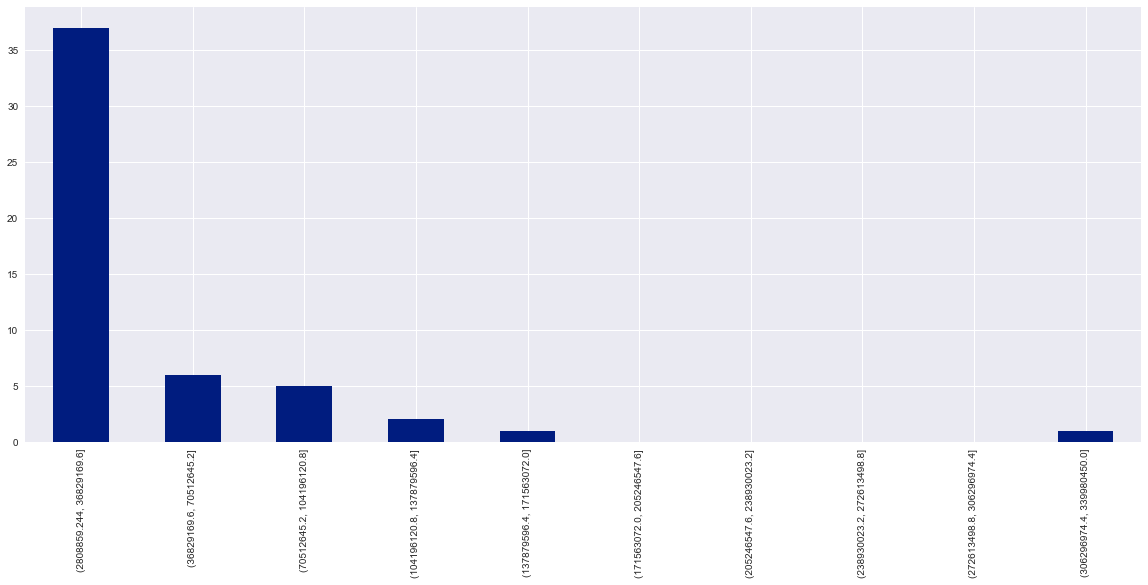

In [162]:
df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 10)
df_metropolitana["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

<ipython-input-163-8ef27283421e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 20)


<AxesSubplot:>

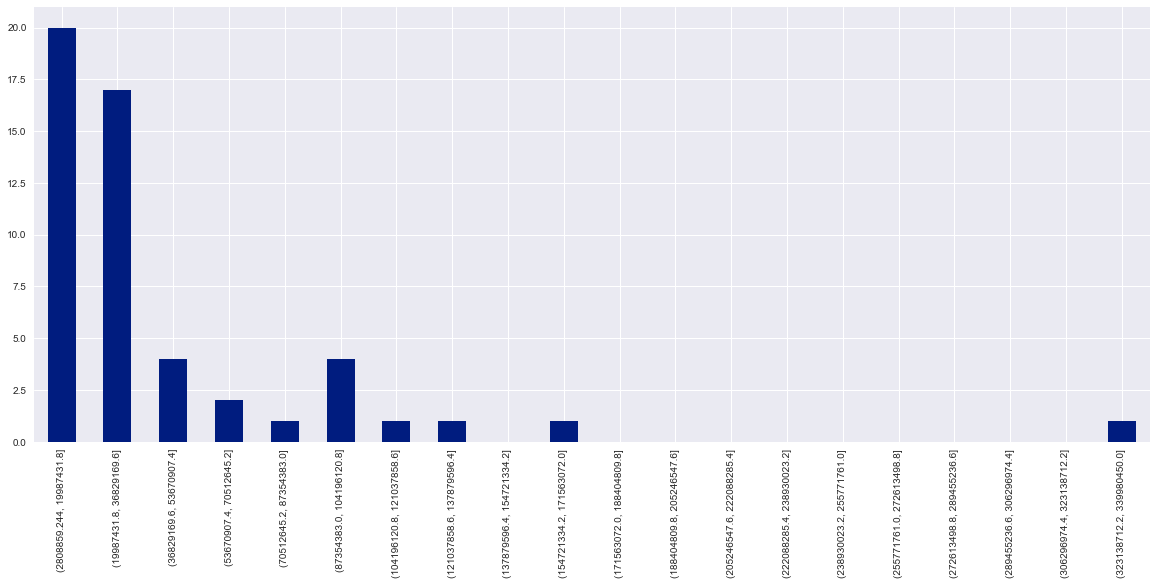

In [163]:
df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 20)
df_metropolitana["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

Como vemos, la mayor parte de las comunas tiene un presupuesto bajo. Ahora, ¿qué pasa si calculamos el _skew_ de la columna presupuesto?

In [164]:
df_metropolitana.skew()

PRESUPUESTO    3.579377
dtype: float64

También podemos probar cómo queda el histograma para las comunas de la Región Metropolitana sin la comuna de Las Condes.

<ipython-input-165-2b39379780a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metropolitana_sin_lc["intervalos_presupuesto"] = pd.cut(df_metropolitana_sin_lc["PRESUPUESTO"], 10)


<AxesSubplot:>

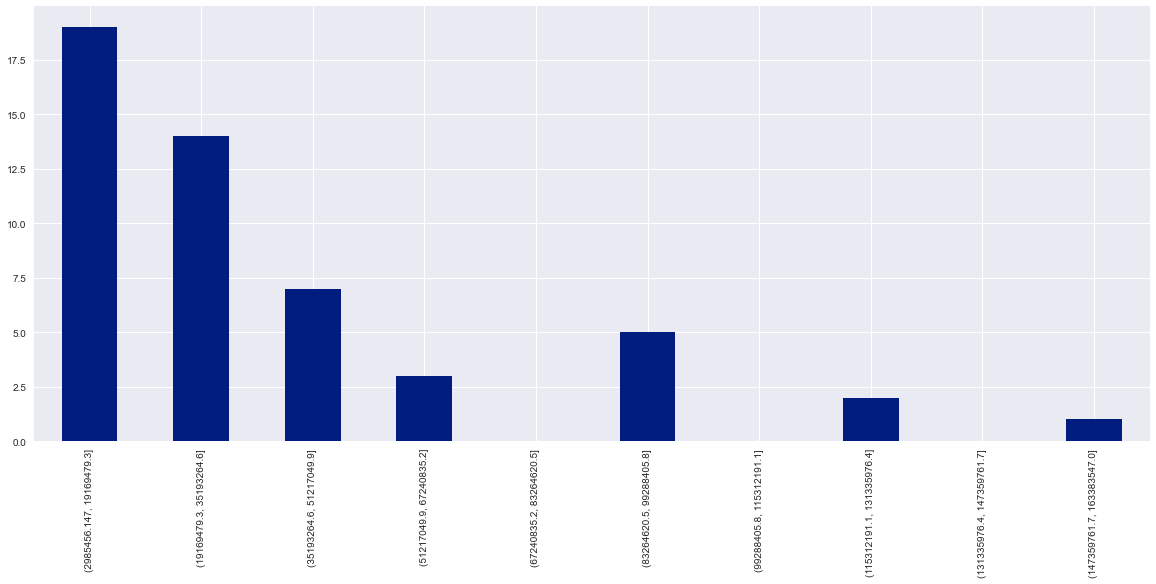

In [165]:
df_metropolitana_sin_lc["intervalos_presupuesto"] = pd.cut(df_metropolitana_sin_lc["PRESUPUESTO"], 10)
df_metropolitana_sin_lc["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

<ipython-input-166-465fe90b4c44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metropolitana_sin_lc["intervalos_presupuesto"] = pd.cut(df_metropolitana_sin_lc["PRESUPUESTO"], 20)


<AxesSubplot:>

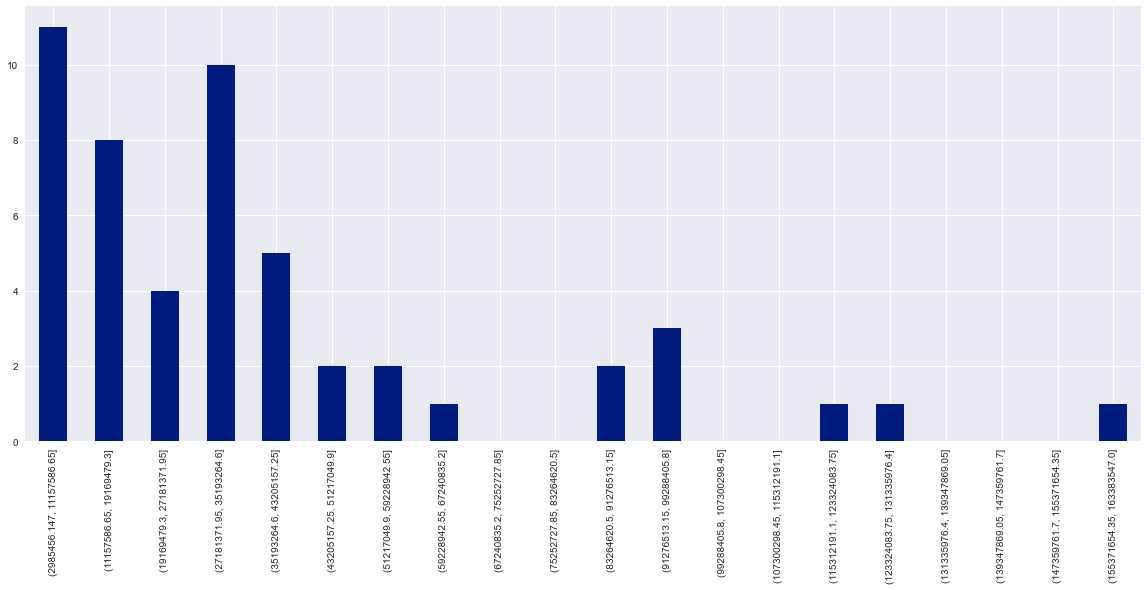

In [166]:
df_metropolitana_sin_lc["intervalos_presupuesto"] = pd.cut(df_metropolitana_sin_lc["PRESUPUESTO"], 20)
df_metropolitana_sin_lc["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

Finalmente podemos probar esto para otra región. Veamos que pasa con la región de Aysen.

In [167]:
df_aysen = df_merge[df_merge["Nombre Región"] == "Aysén del General Carlos Ibáñez del Campo"]

<ipython-input-168-2ad83be4de94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aysen["intervalos_presupuesto"] = pd.cut(df_aysen["PRESUPUESTO"], 5)


<AxesSubplot:>

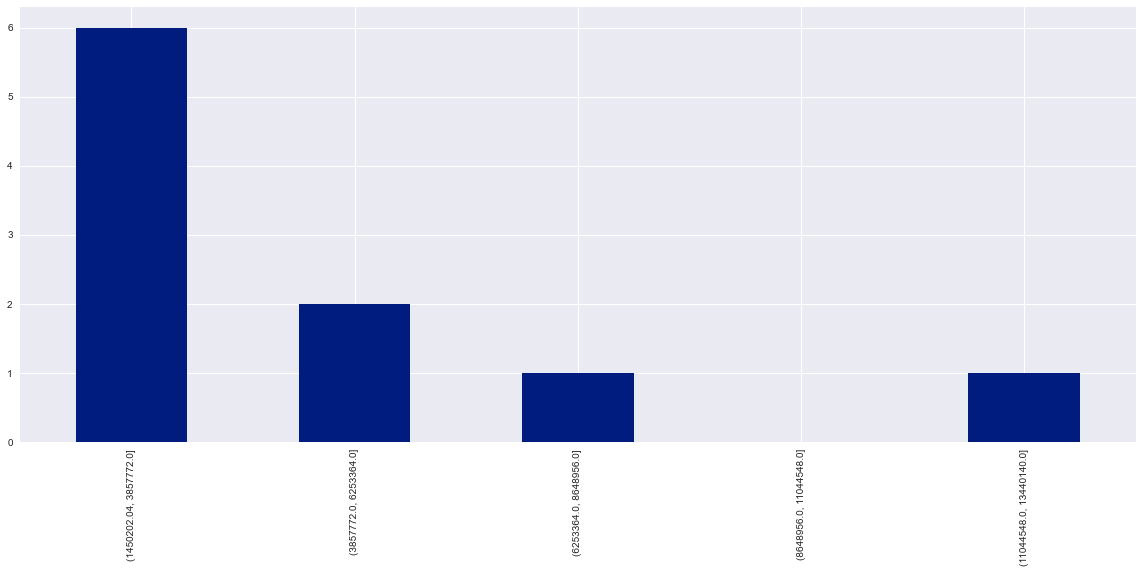

In [168]:
df_aysen["intervalos_presupuesto"] = pd.cut(df_aysen["PRESUPUESTO"], 5)
df_aysen["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')